### Лаборатораная работа №5 (Разделение таблицы данных на выборки)


### Загрузка данных


In [2]:
import pandas as pd

data = pd.read_csv("beverage_r.csv", sep=";")
data.head()

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
0,1,1,0,0,0,1,1,0,1
1,2,1,0,0,0,1,0,0,0
2,3,1,0,0,0,1,0,0,0
3,4,0,1,0,1,0,0,1,0
4,5,1,0,0,0,1,0,0,0


In [3]:
data.shape


(34, 9)

### Задача 1 

Разделить таблицу данных так, чтобы в обучающую выборку попало 66% наблюдений, а в тестовую выборку 33% наблюдений

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    data,
    test_size=0.33,
    random_state=42
)

train.shape, test.shape

((22, 9), (12, 9))

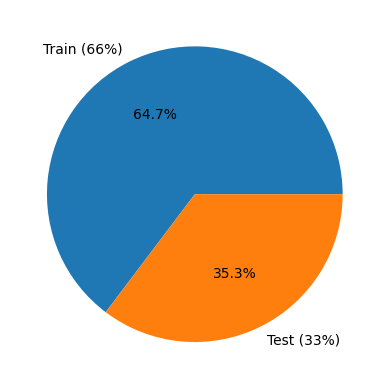

In [5]:
import matplotlib.pyplot as plt

labels = ["Train (66%)", "Test (33%)"]
sizes = [len(train), len(test)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


### Задача 2
Разделить таблицу данных на четыре одинаковых части.

In [6]:
import numpy as np

parts = np.array_split(data, 4)
[len(part) for part in parts]


c:\Users\aruds\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[9, 9, 8, 8]

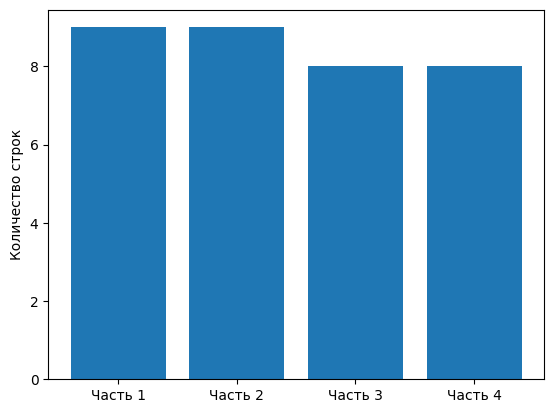

In [7]:
plt.bar(["Часть 1", "Часть 2", "Часть 3", "Часть 4"],
        [len(part) for part in parts])

plt.ylabel("Количество строк")
plt.show()


### Задача 3
Разделить таблицу данных на две стратифицированные подвыборки.

По переменным кока-кола и минералка.

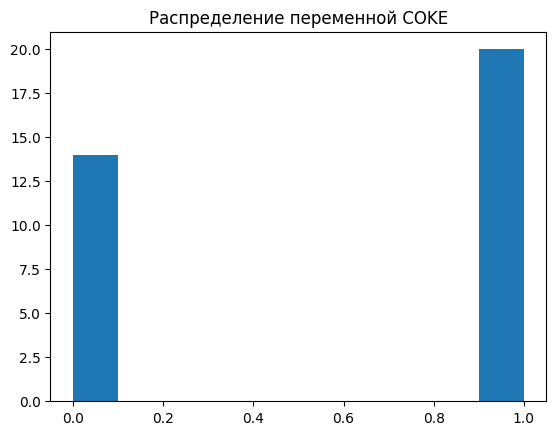

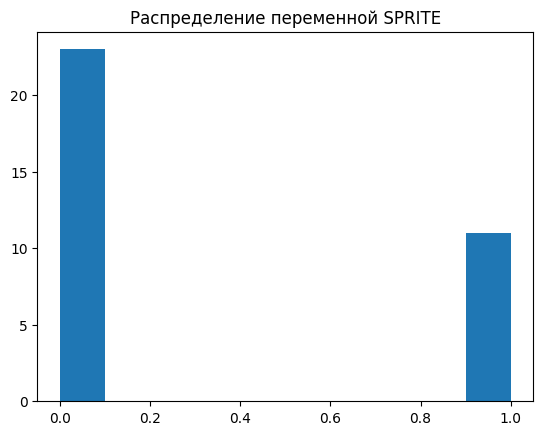

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['COKE'], bins=10)
plt.title("Распределение переменной COKE")
plt.show()

plt.hist(data['SPRITE'], bins=10)
plt.title("Распределение переменной SPRITE")
plt.show()

Так как стратификация работает только по *одной* переменной, мы создадим стратификационную группу -> комбинацию двух переменных.

In [9]:
data['strata'] = data['COKE'].astype(str) + "_" + data['SPRITE'].astype(str)

data['strata'].value_counts()

strata
1_0    12
0_0    11
1_1     8
0_1     3
Name: count, dtype: int64

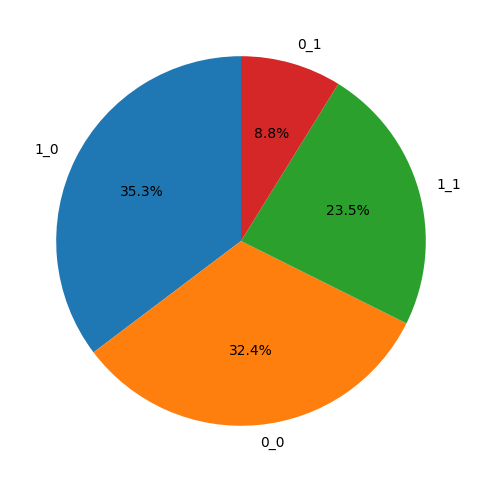

In [10]:
counts = data['strata'].value_counts()

labels = ["1_0", "0_0", "1_1", "0_1"]

sizes = [counts.get(label, 0) for label in labels]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [11]:
train_s, test_s = train_test_split(
    data,
    test_size=0.50,
    random_state=42,
    stratify=data['strata']
)

train_s.shape, test_s.shape


((17, 10), (17, 10))

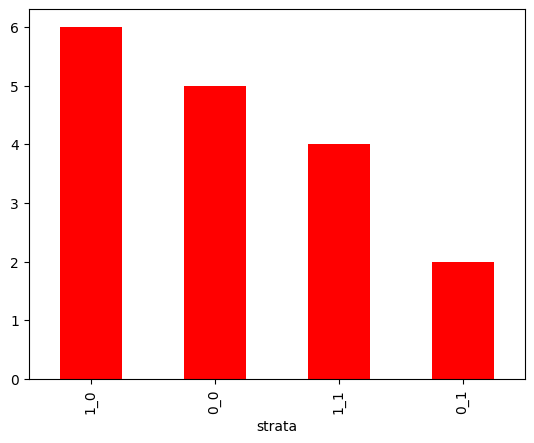

<Axes: xlabel='strata'>

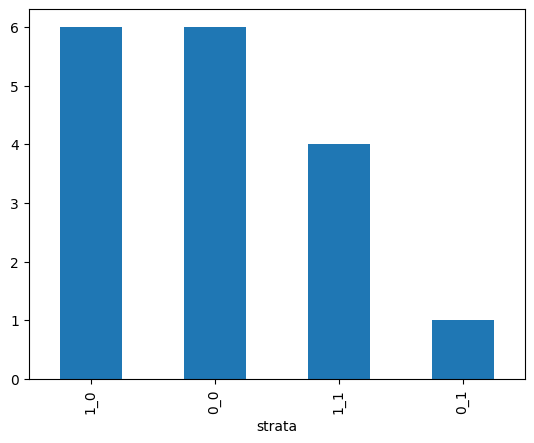

In [12]:
train_s['strata'].value_counts().plot(kind='bar', color="red",  label='Train')

plt.show()

test_s['strata'].value_counts().plot(kind='bar', label='Test')

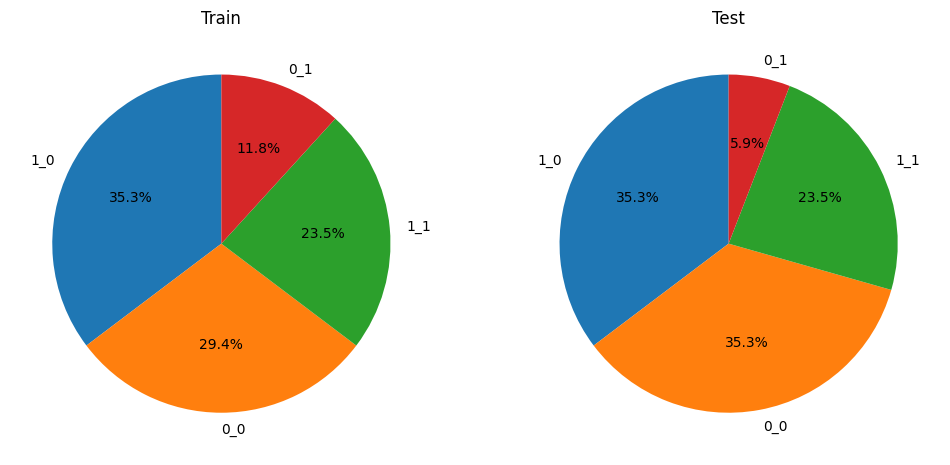

In [13]:
train_counts = train_s['strata'].value_counts()
test_counts = test_s['strata'].value_counts()

labels = ["1_0", "0_0", "1_1", "0_1"]

train_sizes = [train_counts.get(label, 0) for label in labels]
test_sizes = [test_counts.get(label, 0) for label in labels]

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].pie(train_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Train")

ax[1].pie(test_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Test")

plt.show()

### Выводы


Задача 1: 

* Train используется для обучения модели, Test — для проверки качества.

* Применимо для большинства задач ML, когда нужно быстро и равномерно разделить данные.

* Важно для предотвращения переобучения: модель не видит тестовую выборку при обучении.

Задача 2: 

* Полезно для кросс-валидации: каждая часть может по очереди быть тестовой, остальные — обучающими.

* Позволяет получить более устойчивую оценку модели, так как каждая строка попадёт в тест хотя бы раз.

* Хорошо использовать при небольших датасетах, когда нужно максимально использовать все данные для обучения и проверки.

Задача 3: 

* Стратификация сохраняет соотношение категорий в Train и Test, что особенно важно при несбалансированных данных.

* Помогает избежать ситуации, когда редкая категория полностью попадёт в одну подвыборку, и модель её не увидит.